# Speech and Audio Signal Processing

------

## Autocorrelation of Speech Signals: Voiced and Unvoiced Speech

**Autocorrelation** is the correlation of a signal with a delayed copy of itself as a function of delay. It is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise.

$$ 
\large
R_{XX}(\tau) = \lim_{N \rightarrow \infty} \sum_{t=1}^{N-\tau} X(t) X(t+\tau)
$$

Informally, autocorrelation is the similarity between observations as a function of the time lag between them. As a result, the autocorrelation function has peak value at $0$ lags (since both the signals are the same).

<u><b>Voiced and Unvoiced Speech Signals</b></u>

Voiced signals are produced when the vocal cords vibrate during the pronunciation of a phoneme. Thus voiced phonemes tend to have a periodic waveform. Unvoiced signals, by contrast, do not entail the use of the vocal cords and as a result, the waveforms look more like random noise.

Here, we use the property of the short-time autocorrelation to reveal periodicity of the signal. The autocorrelation of the voiced speech segment retains the periodicity. On the other hand, the autocorrelation of the unvoiced speech segment looks more like noise.

<center>
<figure>
    <img src="http://cvsp.cs.ntua.gr/~nassos/resources/speech_course_2004/OnlineSpeechDemos/speechDemo_2004_Part1_09.png">
    <figcaption style="font-size:smaller">Source: 
        <a href = "http://cvsp.cs.ntua.gr/~nassos/resources/speech_course_2004/OnlineSpeechDemos/speechDemo_2004_Part1.html">
            http://cvsp.cs.ntua.gr/~nassos/resources/speech_course_2004/OnlineSpeechDemos/speechDemo_2004_Part1.html
        </a>
    </figcaption>
</figure>
</center>
   



## Reference

1.   [Short-Time Speech Measurements, Short-Time Autocorrelation, Voiced and Unvoiced Speech](http://cvsp.cs.ntua.gr/~nassos/resources/speech_course_2004/OnlineSpeechDemos/speechDemo_2004_Part1.html#8)
2.   [Phonetic description of Malayalam consonants](https://blog.smc.org.in/phonetic-description-of-malayalam-consonants/)
3.   [Malayalam alphabet: overview of script characters](https://malayalam.wisdomlib.org/malayalam-script)
4.   [Priyanka Gupta and S Sengupta, Voiced/Unvoiced Decision with a Comparative Study of Two Pitch Detection Techniques, International Research Journal of Engineering and Technology (IRJET), Volume: 05 Issue: 07 | July 2018 ](https://www.irjet.net/archives/V5/i7/IRJET-V5I7395.pdf)
5.   [Voice and Unvoice Decision](https://www.clear.rice.edu/elec532/PROJECTS00/vocode/uv/uvdet.html)
6.   [Identification of Voice/Unvoiced/Silence regions of Speech](http://vlab.amrita.edu/?sub=3&brch=164&sim=613&cnt=1)
7.   [Separation of Voiced and Unvoiced using Zero crossing rate and Energy of the Speech Signal](https://www.asee.org/documents/zones/zone1/2008/student/ASEE12008_0044_paper.pdf)
8.   [Voiced and Unvoiced Speech Overview](http://www.seas.ucla.edu/dsplab/vus/over.html)
9.   [Autocorrelation | Wikipedia](https://en.wikipedia.org/wiki/Autocorrelation)


## Disclaimer

This program does not classify voiced and unvoiced phonemes on its own. This program is used to plot the autocorrelation of speech segments from which the classification is done manually.


In [1]:
## Requirements.txt
## The following are the external libraries used in the program

## 1. Matplotlib - for plotting graphs and figures
## 2. Numpy      - for n-D array operations
## 3. Librosa    - for audio signal processing

## The Audio

The audio contains the recording of me saying the sentence <span style="color:red; background:#FFFACD; font-size:12pt">Creativity is intelligence having fun</span>.

In [2]:
## Upload Audio
## uncomment the following lines when using Google Colab

# from google.colab import files
# files.upload()

In [3]:
## Import Dependencies

import numpy
from math import floor
import librosa, librosa.display
import matplotlib.pyplot as plt, IPython.display as ipd

In [4]:
## Load the audio (Sentence)

audio, samplingRate = librosa.load('Sentence.wav', 44100)
ipd.Audio(audio, rate=samplingRate)

Text(0.5, 1.0, 'Waveform of the full audio')

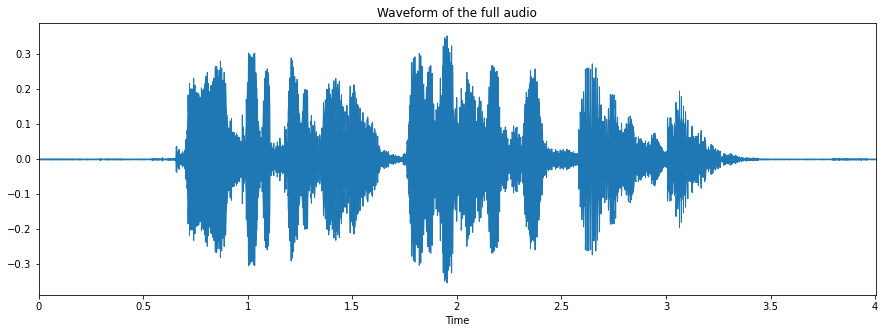

In [5]:
## Plot the waveform

plt.figure(figsize=(15, 5))
librosa.display.waveplot(audio, samplingRate)
plt.title("Waveform of the full audio")

## Word: **Creativity**

### Phoneme 1

Here the phoneme is **k**

In [6]:
ph = audio[28884:30429]
ipd.Audio(ph, rate=samplingRate)

Text(1675.0, 0.15, 'k: Unvoiced Phoneme')

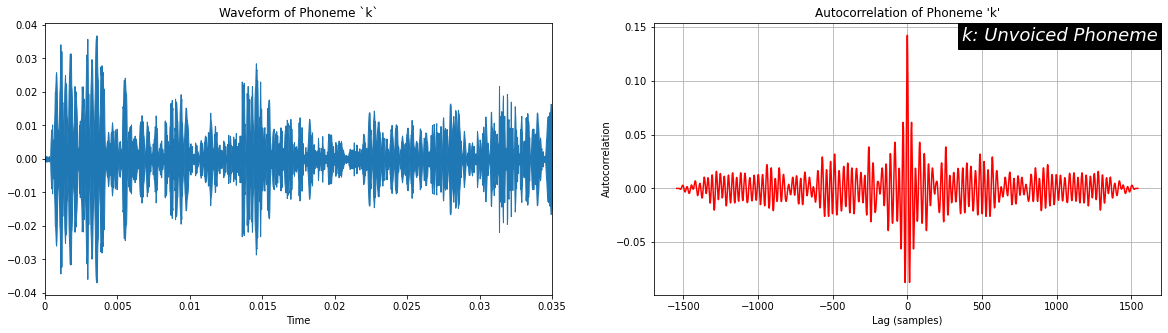

In [7]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `k`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'k'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 25
ylimval = round(plt.ylim()[1],2)

plt.text(xlimval, ylimval, "k: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 2

Here the phoneme is **r**

In [8]:
ph = audio[30429:32634]
ipd.Audio(ph, rate=samplingRate)

Text(2380.0, 11.61, 'r: Voiced Phoneme')

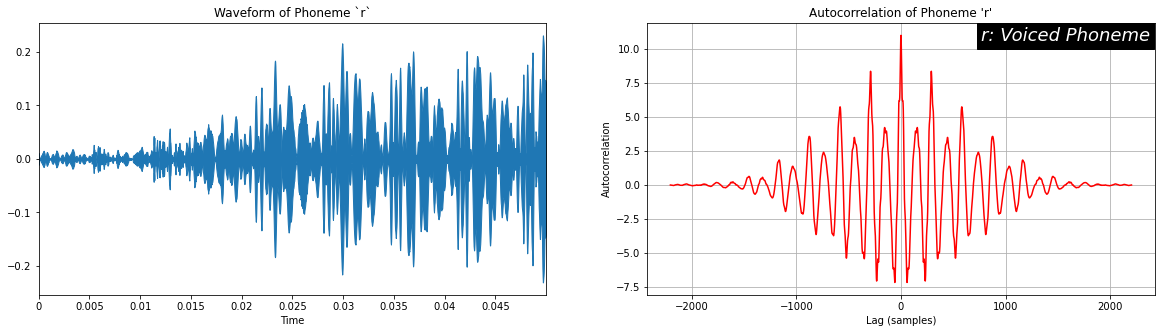

In [9]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `r`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'r'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 25 - 20
ylimval = round(plt.ylim()[1],2) - 0.3

plt.text(xlimval, ylimval, "r: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 3

Here the phoneme is **i**

In [10]:
ph = audio[32634:36603]
ipd.Audio(ph, rate=samplingRate)

Text(4300.0, 29.82, 'i: Voiced Phoneme')

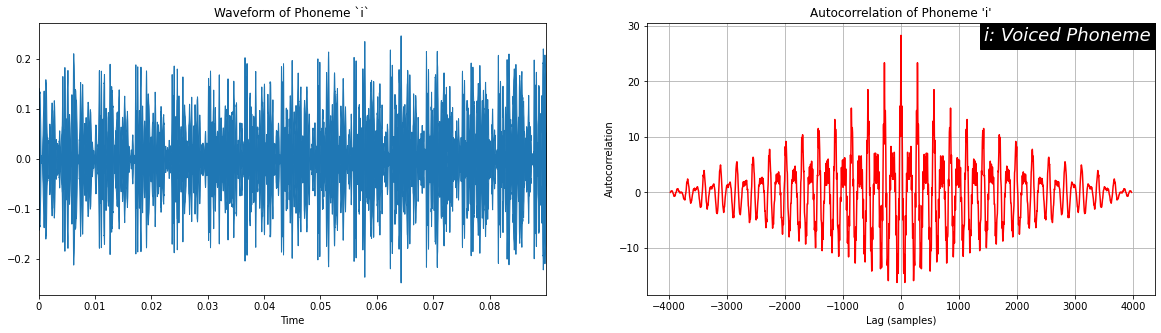

In [11]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.7

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 4

Here the phoneme is **a**

In [12]:
ph = audio[36603:40131]
ipd.Audio(ph, rate=samplingRate)

Text(3800.0, 44.54, 'a: Voiced Phoneme')

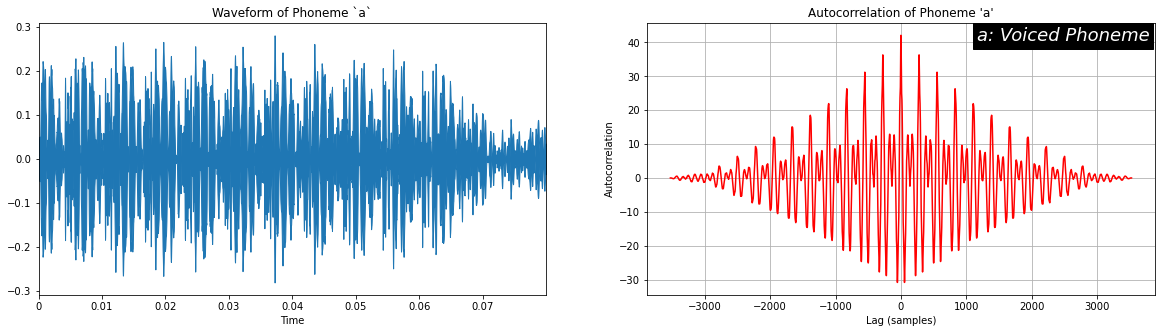

In [13]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `a`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'a'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 1.2

plt.text(xlimval, ylimval, "a: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 5

Here the phoneme is **RR**

In [14]:
ph = audio[40131:43659]
ipd.Audio(ph, rate=samplingRate)

Text(3813.0, 3.59, 'RR: Unvoiced Phoneme')

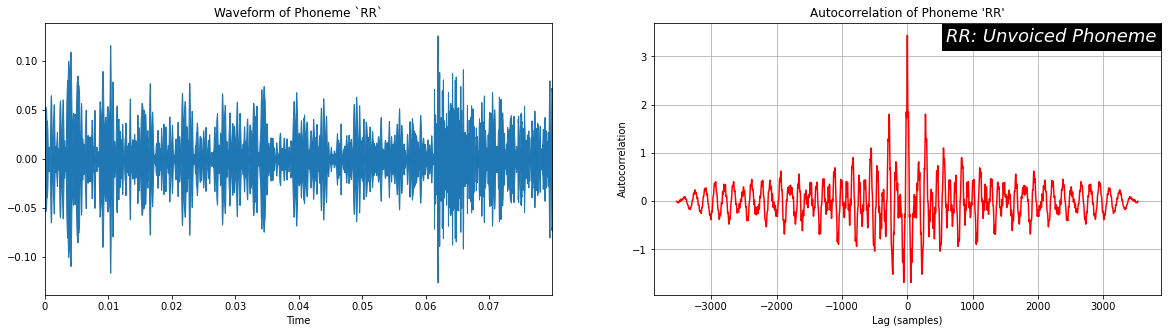

In [15]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `RR`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'RR'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 93
ylimval = round(plt.ylim()[1],2) - 0.1

plt.text(xlimval, ylimval, "RR: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 6

Here the phoneme is **i**

In [16]:
ph = audio[43659:45423]
ipd.Audio(ph, rate=samplingRate)

Text(1900.0, 41.33, 'i: Voiced Phoneme')

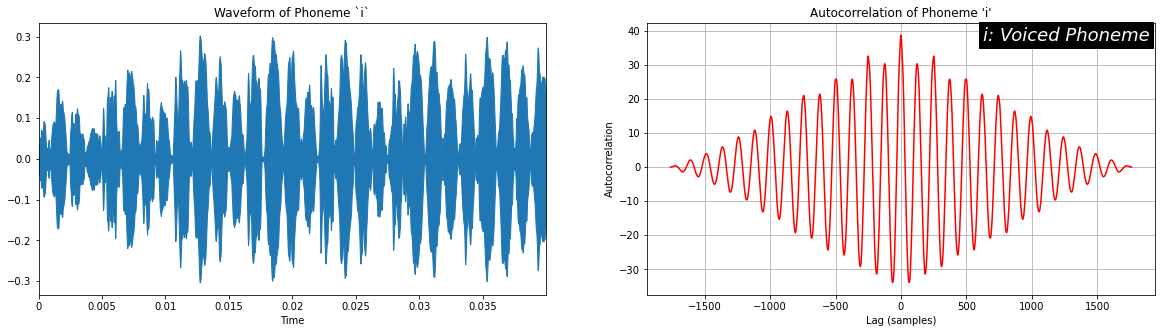

In [17]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 1

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 7

Here the phoneme is **v**

In [18]:
ph = audio[45423:48069]
ipd.Audio(ph, rate=samplingRate)

Text(2875.0, 29.43, 'v: Voiced Phoneme')

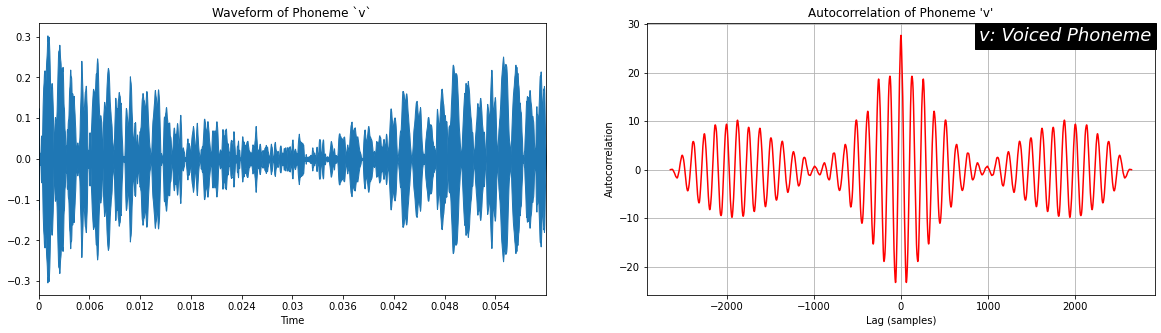

In [19]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `v`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'v'")

xlimval = plt.xlim()[1] - plt.xlim()[1]% 125
ylimval = round(plt.ylim()[1],2) - 0.8

plt.text(xlimval, ylimval, "v: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 8

Here the phoneme is **i**

In [20]:
ph = audio[48069:50274]
ipd.Audio(ph, rate=samplingRate)

Text(2375.0, 13.38, 'i: Voiced Phoneme')

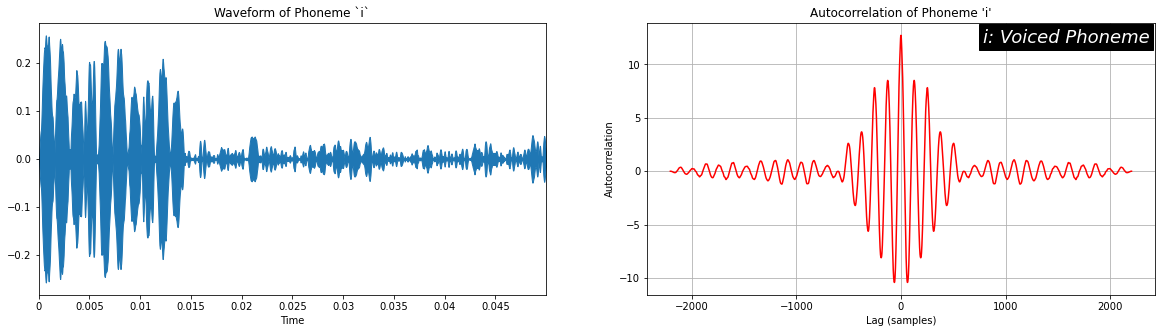

In [21]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 95
ylimval = round(plt.ylim()[1],2) - 0.5

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 9

Here the phoneme is **RR**

In [22]:
ph = audio[50274:53361]
ipd.Audio(ph, rate=samplingRate)

Text(3330.0, 14.66, 'RR: Unoiced Phoneme')

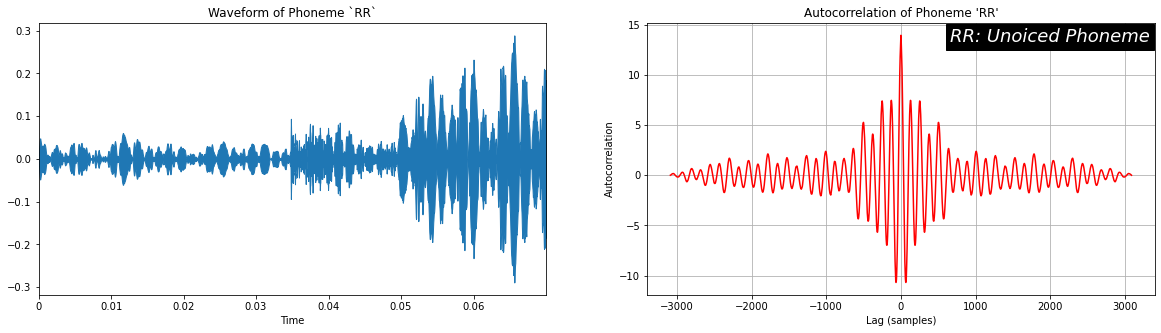

In [23]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `RR`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'RR'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 90
ylimval = round(plt.ylim()[1],2) - 0.5

plt.text(xlimval, ylimval, "RR: Unoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 10

Here the phoneme is **i**

In [24]:
ph = audio[53361:56448]
ipd.Audio(ph, rate=samplingRate)

Text(3333.0, 36.6, 'i: Voiced Phoneme')

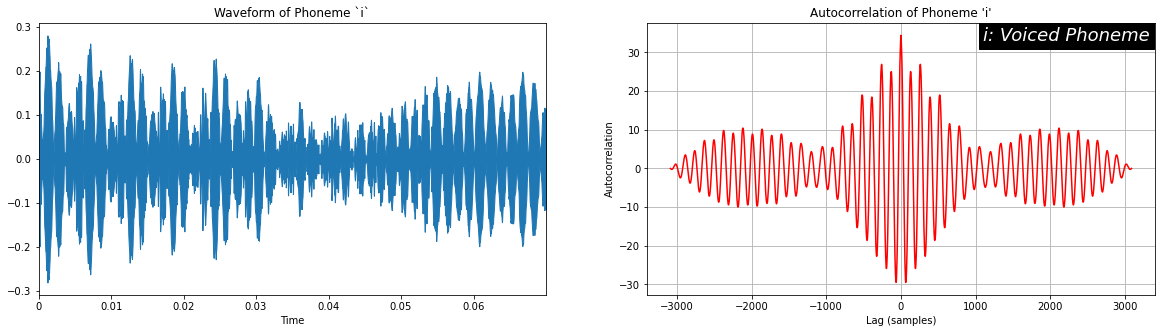

In [25]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 101
ylimval = round(plt.ylim()[1],2) - 1

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

## Word: **is**

### Phoneme 11

Here the phoneme is **i**

In [26]:
ph = audio[59775:63945]
ipd.Audio(ph, rate=samplingRate)

Text(4500.0, 36.99, 'i: Voiced Phoneme')

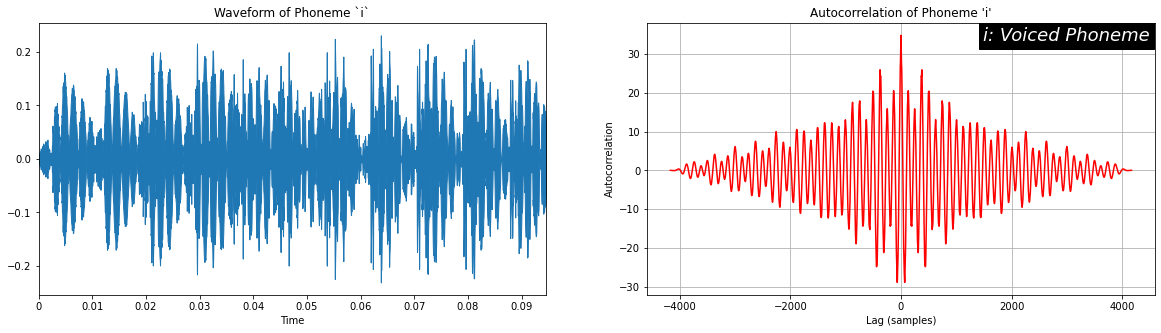

In [27]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 125
ylimval = round(plt.ylim()[1],2) - 1

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 12

Here the phoneme is **s**

In [28]:
ph = audio[63945:72765]
ipd.Audio(ph, rate=samplingRate)

Text(9600.0, 18.860000000000003, 's: Unvoiced Phoneme')

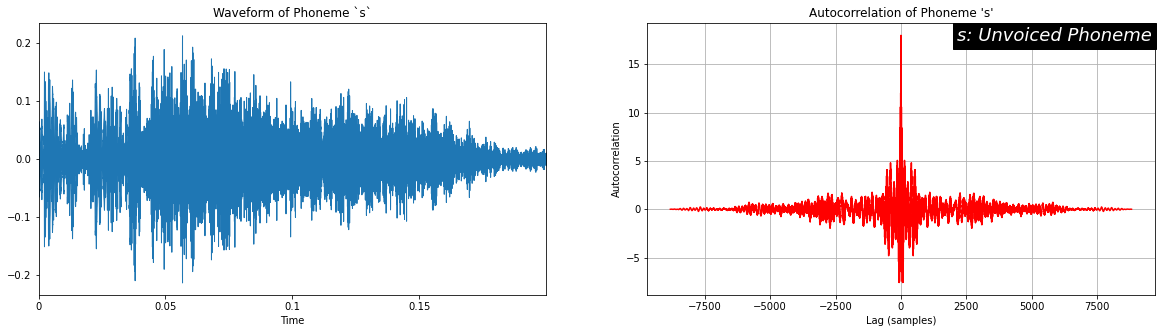

In [29]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `s`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 's'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 150
ylimval = round(plt.ylim()[1],2) - 0.4

plt.text(xlimval, ylimval, "s: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

## Word: **intelligence**

### Phoneme 13

Here the phoneme is **i**

In [30]:
ph = audio[76293:79380]
ipd.Audio(ph, rate=samplingRate)

Text(3325.0, 24.01, 'i: Voiced Phoneme')

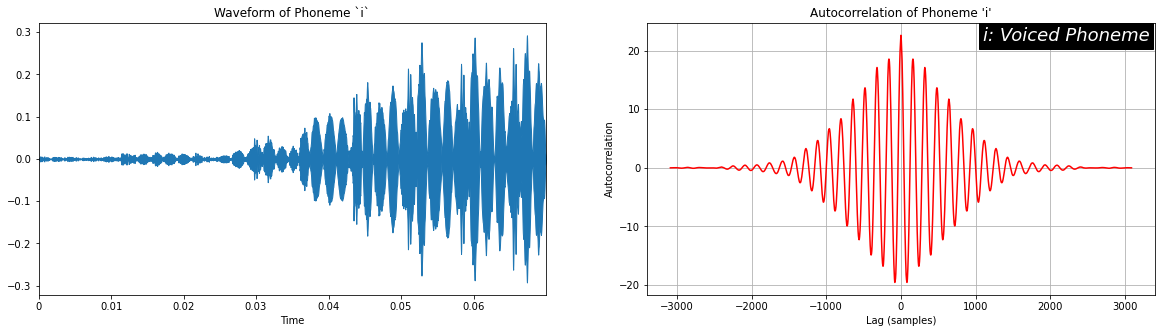

In [31]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 95
ylimval = round(plt.ylim()[1],2) - 0.7

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 14

Here the phoneme is **n**

In [32]:
ph = audio[79380:83349]
ipd.Audio(ph, rate=samplingRate)

Text(4320.0, 76.82000000000001, 'n: Voiced Phoneme')

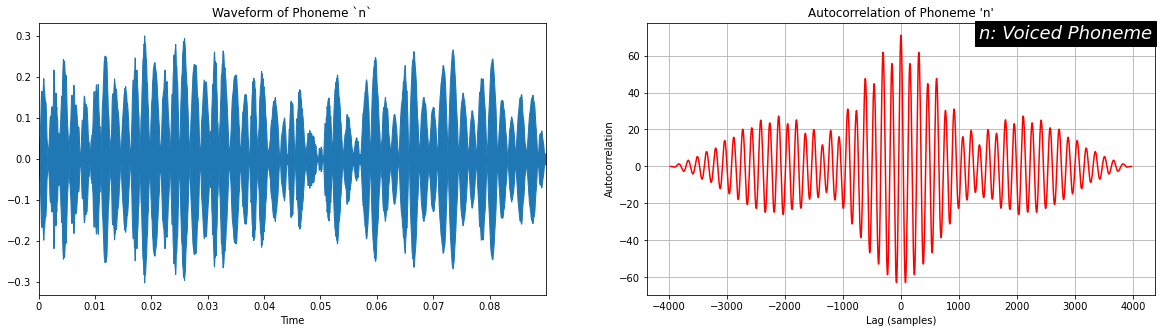

In [33]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `n`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'n'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 90
ylimval = round(plt.ylim()[1],2) - 0.8

plt.text(xlimval, ylimval, "n: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 15

Here the phoneme is **RR**

In [34]:
ph = audio[83349:85113]
ipd.Audio(ph, rate=samplingRate)

Text(1900.0, 14.05, 'RR: Unvoiced Phoneme')

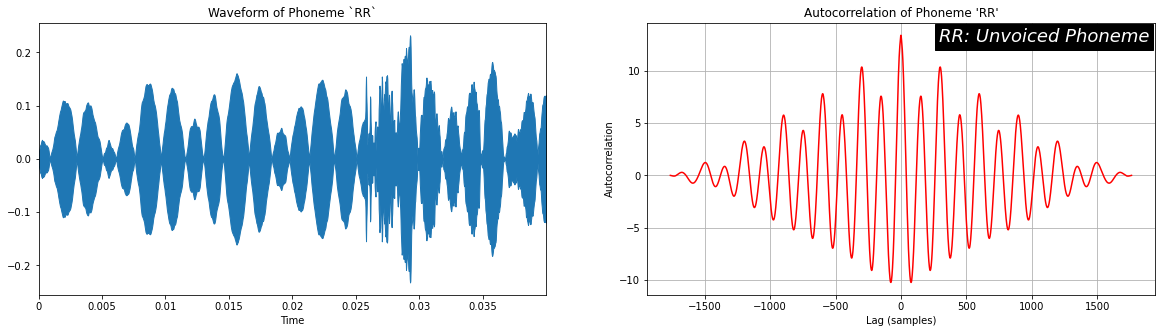

In [35]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `RR`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'RR'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.5

plt.text(xlimval, ylimval, "RR: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 16

Here the phoneme is **e**

In [36]:
ph = audio[85113:87318]
ipd.Audio(ph, rate=samplingRate)

Text(2400.0, 55.5, 'e: Voiced Phoneme')

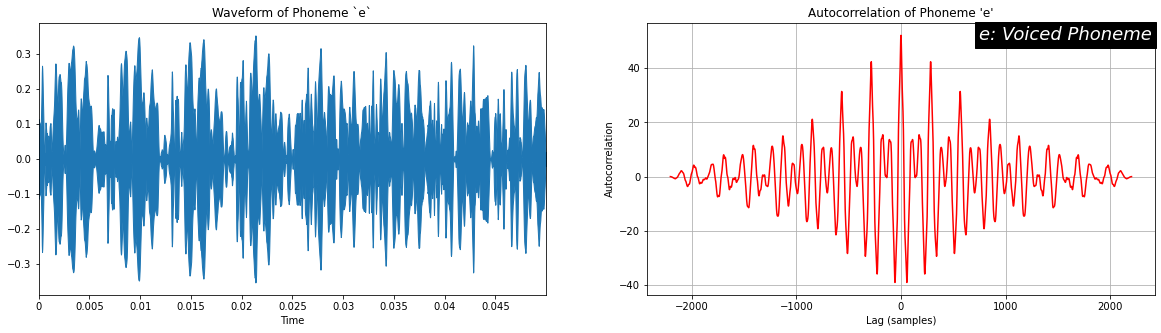

In [37]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `e`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'e'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 1.2

plt.text(xlimval, ylimval, "e: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 17

Here the phoneme is **l**

In [38]:
ph = audio[87318:89523]
ipd.Audio(ph, rate=samplingRate)

Text(2400.0, 10.209999999999999, 'l: Voiced Phoneme')

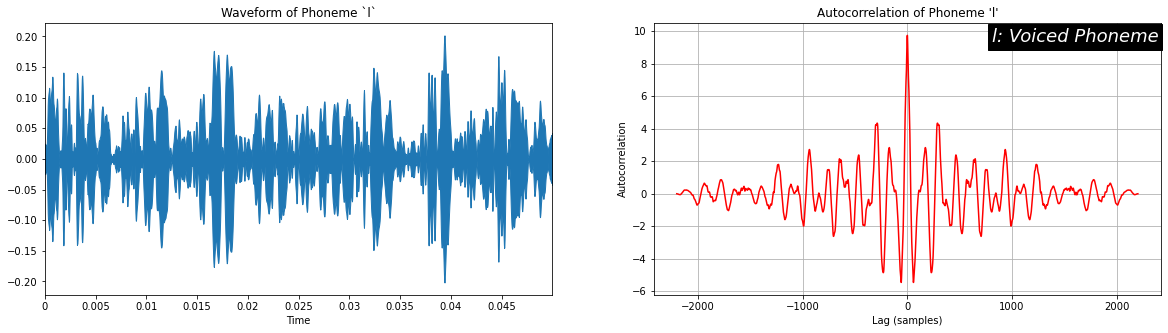

In [39]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `l`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'l'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.3

plt.text(xlimval, ylimval, "l: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 18

Here the phoneme is **i**

In [40]:
ph = audio[89523:92610]
ipd.Audio(ph, rate=samplingRate)

Text(3330.0, 23.3, 'i: Voiced Phoneme')

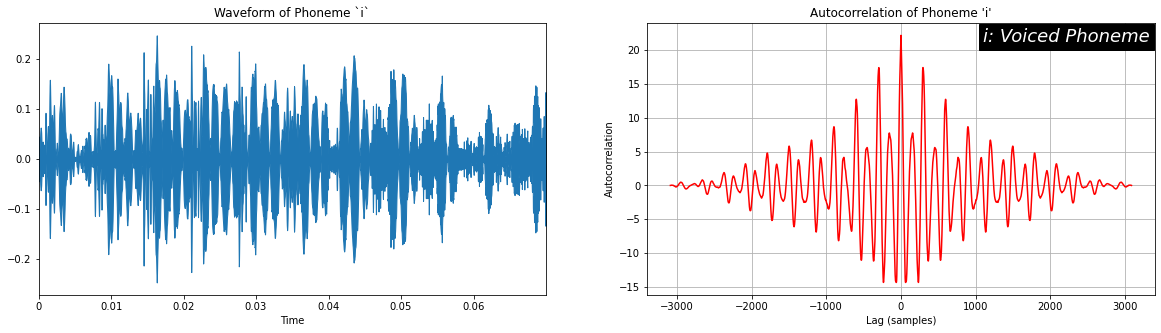

In [41]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 90
ylimval = round(plt.ylim()[1],2) - 0.7

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 19

Here the phoneme is **g**

In [42]:
ph = audio[92610:94374]
ipd.Audio(ph, rate=samplingRate)

Text(1900.0, 4.91, 'g: Voiced Phoneme')

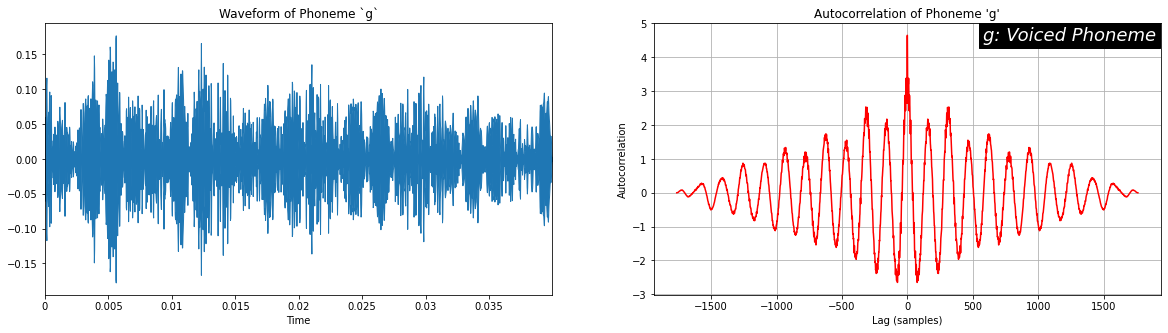

In [43]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `g`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'g'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.1

plt.text(xlimval, ylimval, "g: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 20

Here the phoneme is **e**

In [44]:
ph = audio[94374:97020]
ipd.Audio(ph, rate=samplingRate)

Text(2860.0, 24.55, 'e: Voiced Phoneme')

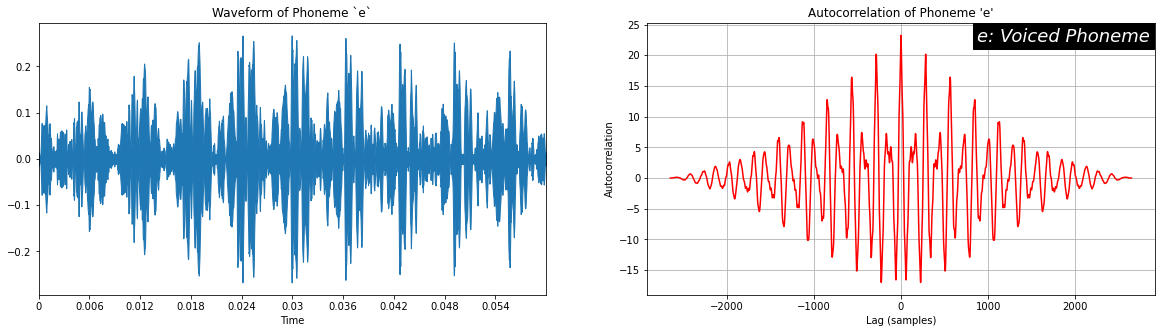

In [45]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `e`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'e'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 110
ylimval = round(plt.ylim()[1],2) - 0.7

plt.text(xlimval, ylimval, "e: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 21

Here the phoneme is **n**

In [46]:
ph = audio[97020:100548]
ipd.Audio(ph, rate=samplingRate)

Text(3800.0, 5.47, 'n: Voiced Phoneme')

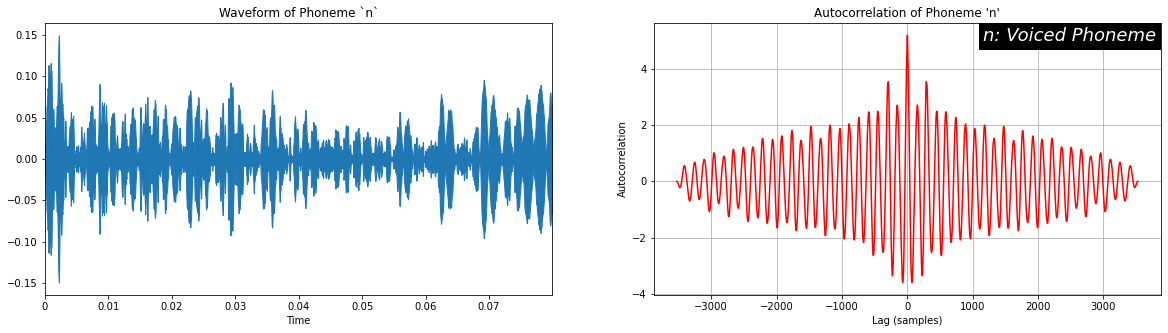

In [47]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `n`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'n'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.15

plt.text(xlimval, ylimval, "n: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 22

Here the phoneme is **s**

In [48]:
ph = audio[100548:108486]
ipd.Audio(ph, rate=samplingRate)

Text(8650.0, 21.83, 's: Unvoiced Phoneme')

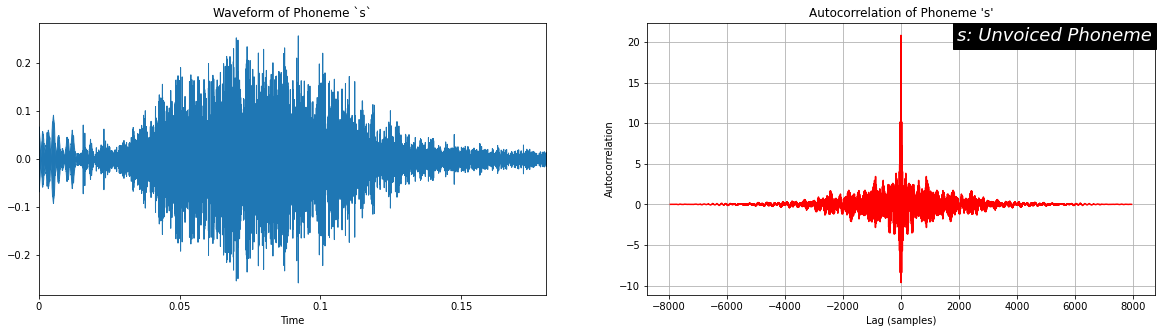

In [49]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `s`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 's'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 173
ylimval = round(plt.ylim()[1],2) - 0.5

plt.text(xlimval, ylimval, "s: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

## Word: **having**

### Phoneme 23

Here the phoneme is **h**

In [50]:
ph = audio[113660:115542]
ipd.Audio(ph, rate=samplingRate)

Text(2040.0, 5.0600000000000005, 'h: Voiced Phoneme')

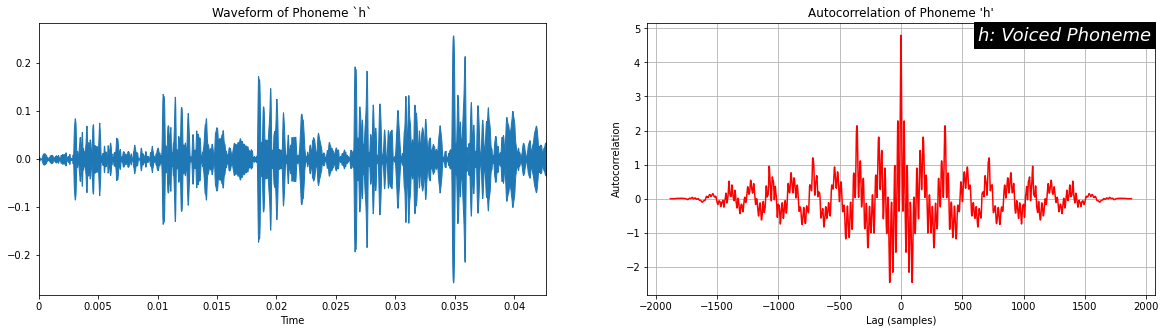

In [51]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `h`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'h'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 60
ylimval = round(plt.ylim()[1],2) - 0.1

plt.text(xlimval, ylimval, "h: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 24

Here the phoneme is **a**

In [52]:
ph = audio[115542:118188]
ipd.Audio(ph, rate=samplingRate)

Text(2880.0, 12.42, 'a: Voiced Phoneme')

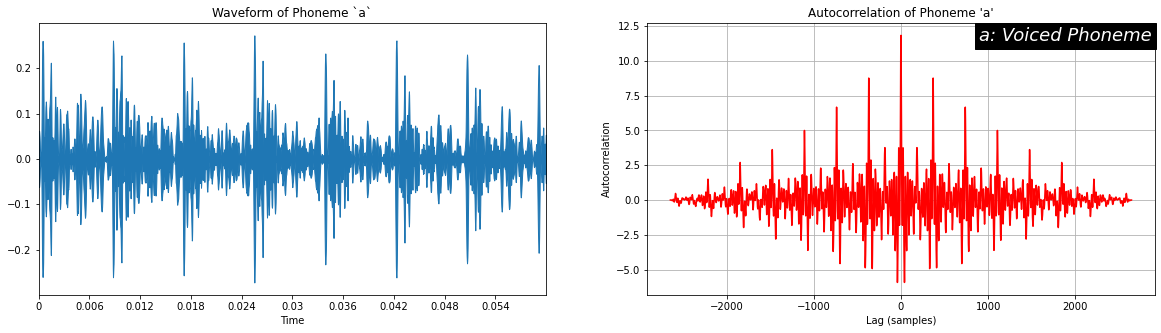

In [53]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `a`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'a'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 60
ylimval = round(plt.ylim()[1],2) - 0.3

plt.text(xlimval, ylimval, "a: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 25

Here the phoneme is **v**

In [54]:
ph = audio[118188:120834]
ipd.Audio(ph, rate=samplingRate)

Text(2860.0, 6.51, 'v: Voiced Phoneme')

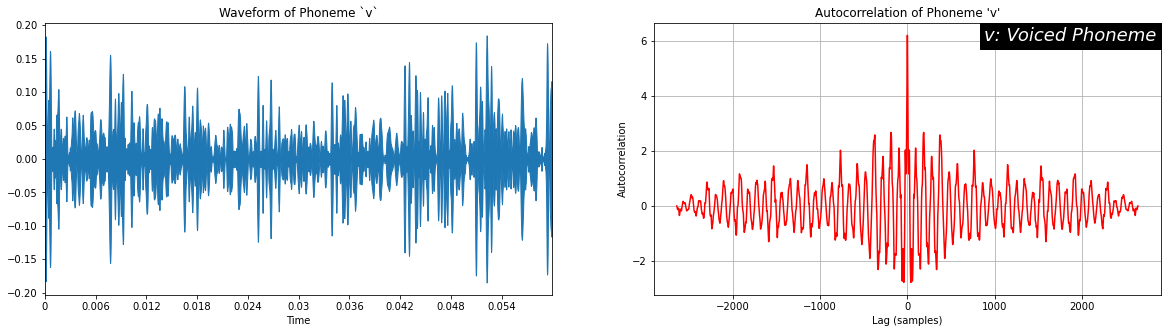

In [55]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `v`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'v'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 110
ylimval = round(plt.ylim()[1],2) - 0.15

plt.text(xlimval, ylimval, "v: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 26

Here the phoneme is **i**

In [56]:
ph = audio[120834:123480]
ipd.Audio(ph, rate=samplingRate)

Text(2860.0, 8.31, 'i: Voiced Phoneme')

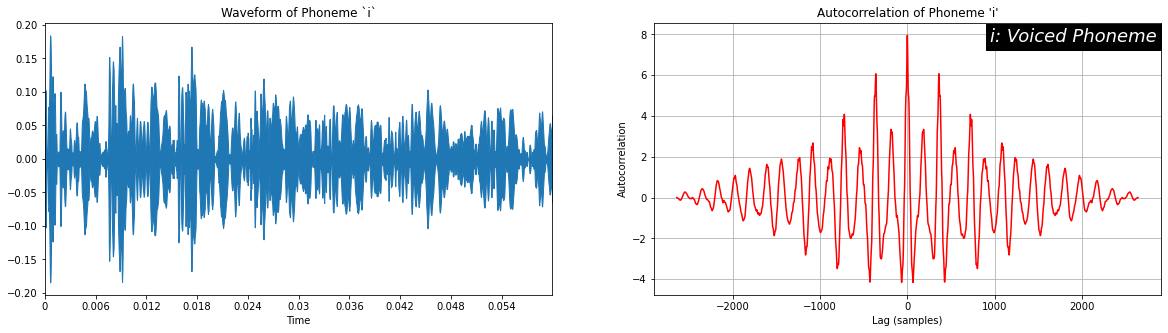

In [57]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `i`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'i'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 110
ylimval = round(plt.ylim()[1],2) - 0.25

plt.text(xlimval, ylimval, "i: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 27

Here the phoneme is **~N**

In [58]:
ph = audio[123480:127890]
ipd.Audio(ph, rate=samplingRate)

Text(4800.0, 9.379999999999999, '~N: Voiced Phoneme')

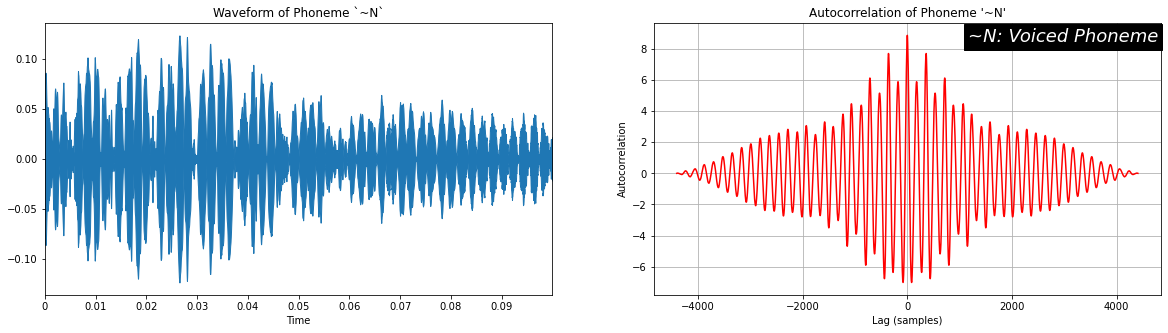

In [59]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `~N`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme '~N'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.3

plt.text(xlimval, ylimval, "~N: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

## Word: **fun**

### Phoneme 28

Here the phoneme is **ph**

In [60]:
ph = audio[127890:132300]
ipd.Audio(ph, rate=samplingRate)

Text(4800.0, 1.47, 'ph: Unvoiced Phoneme')

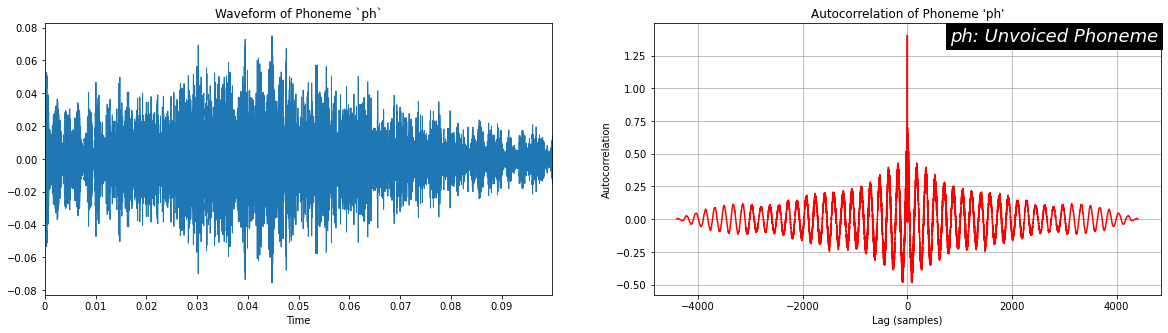

In [61]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `ph`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'ph'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 100
ylimval = round(plt.ylim()[1],2) - 0.03

plt.text(xlimval, ylimval, "ph: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 29

Here the phoneme is **a**

In [62]:
ph = audio[132300:135387]
ipd.Audio(ph, rate=samplingRate)

Text(3330.0, 9.690000000000001, 'a: Voiced Phoneme')

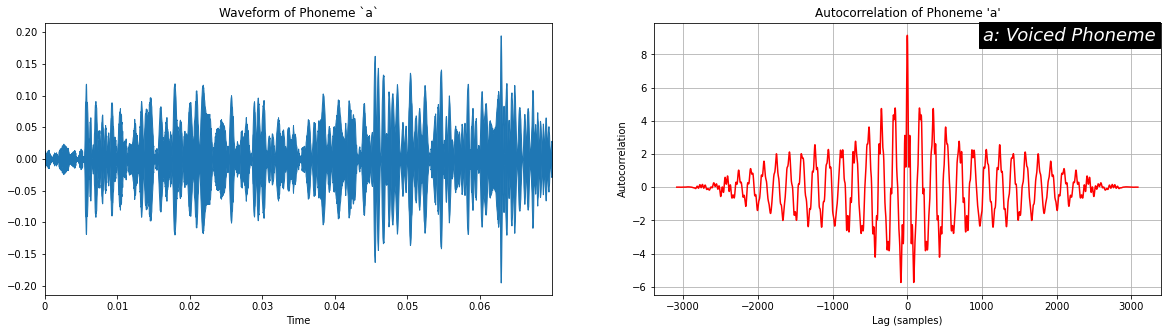

In [63]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `a`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'a'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 90
ylimval = round(plt.ylim()[1],2) - 0.2

plt.text(xlimval, ylimval, "a: Voiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))

### Phoneme 30

Here the phoneme is **N**

In [64]:
ph = audio[135387:150000]
ipd.Audio(ph, rate=samplingRate)

Text(15950.0, 9.459999999999999, 'N: Unvoiced Phoneme')

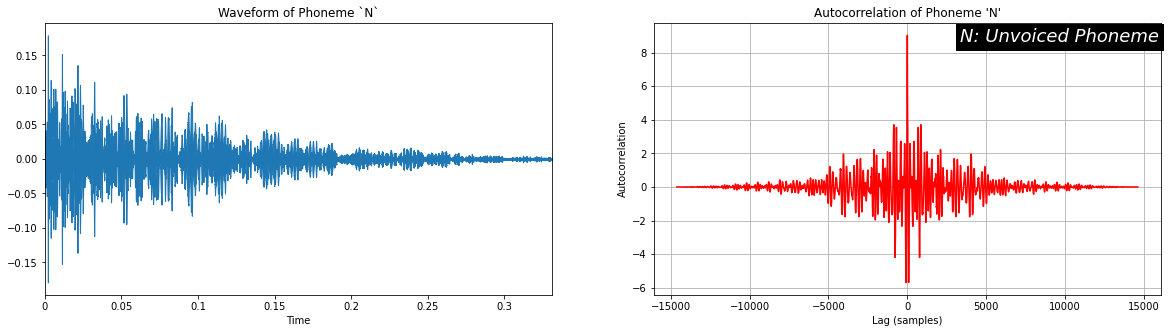

In [65]:
## Compute autocorrelation

ac = librosa.autocorrelate(ph)
ac = numpy.concatenate((ac[::-1], ac))
lag = range(-ac.shape[0]//2, ac.shape[0]//2)


## Plot the audio waveform

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.waveplot(ph, samplingRate)
plt.title("Waveform of Phoneme `N`")


# Plot the autocorrelation

plt.subplot(1,2,2)
plt.plot(lag, ac, 'r')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid('on')
plt.title("Autocorrelation of Phoneme 'N'")

xlimval = plt.xlim()[1] - plt.xlim()[1] % 550
ylimval = round(plt.ylim()[1],2) - 0.3

plt.text(xlimval, ylimval, "N: Unvoiced Phoneme", fontsize=18, color='white',\
         fontstyle='italic', horizontalalignment='right', \
         verticalalignment='top', \
         bbox=dict(facecolor='black', alpha=1))